# Stock Price Preiction using LSTMs
***

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [87]:
data = pd.read_csv('./AAPL.csv')  # Downloaded data from Yahoo Finance
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [88]:
data = data[['Date', 'Close']]
data

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10857,2024-01-08,185.559998
10858,2024-01-09,185.139999
10859,2024-01-10,186.190002
10860,2024-01-11,185.589996


In [89]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10857   2024-01-08
10858   2024-01-09
10859   2024-01-10
10860   2024-01-11
10861   2024-01-12
Name: Date, Length: 10862, dtype: datetime64[ns]

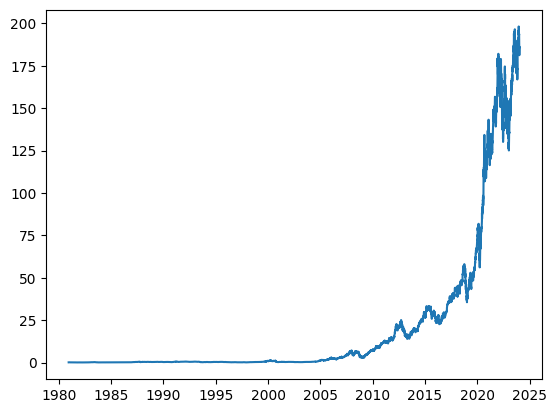

In [90]:
data.index = data.pop('Date')
plt.plot(data.index, data['Close'])

In [91]:
value = 3
for i in range(1,4):
    data[f'Target-{i}'] = data['Close'].shift(i)
data = data.dropna()
data = data.rename(columns={"Close":'Target'})

In [92]:
print(data)

                Target    Target-1    Target-2    Target-3
Date                                                      
1980-12-17    0.115513    0.112723    0.121652    0.128348
1980-12-18    0.118862    0.115513    0.112723    0.121652
1980-12-19    0.126116    0.118862    0.115513    0.112723
1980-12-22    0.132254    0.126116    0.118862    0.115513
1980-12-23    0.137835    0.132254    0.126116    0.118862
...                ...         ...         ...         ...
2024-01-08  185.559998  181.179993  181.910004  184.250000
2024-01-09  185.139999  185.559998  181.179993  181.910004
2024-01-10  186.190002  185.139999  185.559998  181.179993
2024-01-11  185.589996  186.190002  185.139999  185.559998
2024-01-12  185.919998  185.589996  186.190002  185.139999

[10859 rows x 4 columns]


In [102]:
dates = data.index.to_numpy()
features = data.drop(['Target'], axis=1).to_numpy()
X = features.reshape((len(dates), features.shape[1],1))
Y = data['Target'].to_numpy()
X.astype(np.float32)
Y.astype(np.float32)

dates.shape, X.shape, Y.shape  # Checking if all three consists of the same amount of rows

((10859,), (10859, 3, 1), (10859,))

In [111]:
dates_train, dates_temp, X_train, X_temp, Y_train, Y_temp = train_test_split(dates, X, Y, test_size=0.2, shuffle=False)
dates_test, dates_val, X_test, X_val, Y_test, Y_val = train_test_split(dates_temp, X_temp, Y_temp, test_size=0.5, shuffle=False)

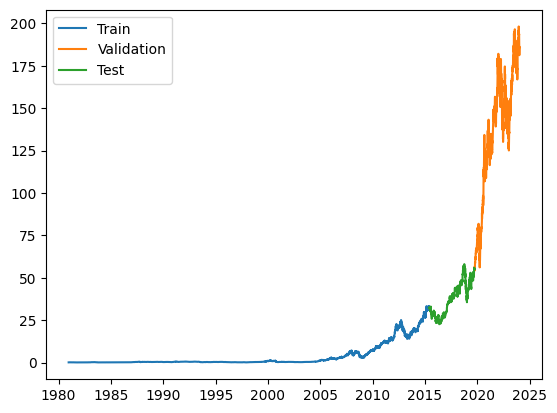

In [112]:
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['Train', 'Validation', 'Test'])

## Model Training
***

In [ ]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)